In [28]:
import numpy as np

np.random.seed(123)
#k1 = root height - internal node height
#k2 = internal node height
#T = 0,1,2 three topologies
#i = num of samples

# Kingman’s n-coalescent, prob(k1,y,T), where T defines y and k1  
def prob(k1, k2):
    Ne = 1 # 2N
    # exp(−u_k * k(k−1) / 2) = -y*3*(3-1)/2 or -k1*2*(2-1)/2
    p = (1/Ne) * np.exp(-3*k2/Ne) * (1/Ne) * np.exp(-k1/Ne) 
    return p
    
# propose
def getProposal(k1, k2, T):
    k1_ = k1; k2_ = k2; T1 = T
    rand = np.random #.uniform(0, 1) [0, 1)
    if (rand.uniform(0, 1) > 0.5):
        #change k1        
        k1_ = k1 + rand.uniform(0, 1) - 0.5
        if (k1_ < 0):
            #change T
            if (rand.uniform(0, 1) > 0.5):
                T1 = np.mod((T+1), 3)
            else:
                T1 = np.mod((T+2), 3)
            k1_ = -k1_
    else:
        #change k2
        k2_ = k2 + rand.uniform(0, 1) - 0.5
    return k1_, k2_, T1

# access proposal
def accept(k1, k2, k1_, k2_):
    if (k1_ < 0 or k2_ < 0):
        return False #reject
    ratio = prob(k1_,k2_) / prob(k1,k2) 
    if (ratio > np.random.uniform(0, 1)):
        return True  #accept
    else:
        return False #reject


# MCMC sampling
samples = 1000
k1 = k2 = 1 
T = i = 0
listK1, listK2, listT = ([] for i in range(3))
while i < samples:    
    k1_, k2_, T1 = getProposal(k1, k2, T)
    isAccepted = accept(k1, k2, k1_, k2_)
    if (isAccepted):
        k1 = k1_;
        k2 = k2_;
        T = T1;
    listK1.append(k1)
    listK2.append(k2)
    listT.append(T)
    i += 1

print("sample size = ", samples)
print("len(k1)", len(listK1), "== len(k2)", len(listK2), "is", len(listK1) == len(listK2))
print(*listK1, sep=', ')
print(*listK2, sep=', ')
print(*listT, sep=', ')

sample size =  1000
len(k1) 1000 == len(k2) 1000 is True
0.7861393349503794, 1.0056083047359423, 1.1904380433208055, 1.1904380433208055, 1.1904380433208055, 0.8729297737743056, 0.9047573608711716, 1.1292126857318068, 0.9521715995849851, 0.9521715995849851, 0.9521715995849851, 0.9521715995849851, 0.9521715995849851, 1.0761245513770963, 1.0761245513770963, 0.826579916773603, 0.8460650360334123, 0.8460650360334123, 0.6888288698077207, 0.6888288698077207, 0.8581426527699931, 0.8581426527699931, 0.8581426527699931, 0.8581426527699931, 0.9853916248212617, 0.9853916248212617, 0.9853916248212617, 0.9853916248212617, 0.9853916248212617, 0.9853916248212617, 0.9853916248212617, 0.8413064905387213, 1.0330082892388983, 1.0330082892388983, 1.0330082892388983, 1.0330082892388983, 1.0330082892388983, 1.387460776763403, 1.387460776763403, 1.2261316226777297, 1.247664682075062, 1.653006257736672, 1.653006257736672, 1.410548321890755, 1.3049183758435299, 1.3049183758435299, 0.8842841662215455, 0.88428416

1, 1, 1, 0.8431780161508695, 0.40285591276043786, 0.40285591276043786, 0.40285591276043786, 0.40285591276043786, 0.40285591276043786, 0.19656995914926723, 0.13027113182879546, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.056101422124623435, 0.31978426356796164, 0.3922412210594347, 0.3922412210594347, 0.4866731005044772, 0.1397436156292503, 0.33171391116106996, 0.33171391116106996, 0.33171391116106996, 0.22989959307905095, 0.22989959307905095, 0.22989959307905095, 0.22989959307905095, 0.2430277472780531, 0.2430277472780531, 0.2430277472780531, 0.2430277472780531, 0.09729242286973161, 0.09729242286973161, 0.09729242286973161, 0.09729242286973161, 0.11730257594221505, 0.11730257594221505, 0.11730257594221505, 0.11730257594221505, 0.11730257594221505, 0.06793906646094983, 0.06793906646094983, 0.06793906646094983, 0.

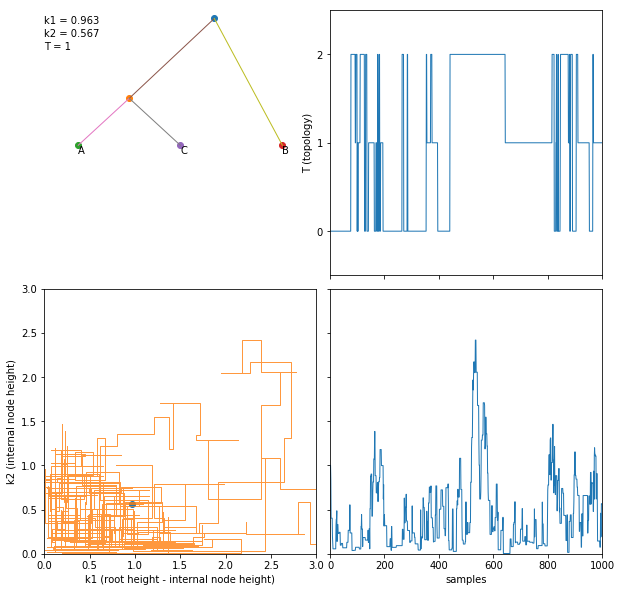

In [35]:
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure(figsize=(10,10))
k1_width = k2_width = (0, 3)
tree_width = (0, 2)
tree_height = (-1.1, 2.1)
states_width = (0, samples)
# tree panel
ax1 = fig.add_subplot(221, xlim=tree_width, ylim=tree_height)
ax1.axis('off')
# topology trace
ax2 = fig.add_subplot(222, xlim=states_width, ylim=(-0.5, 2.5), ylabel='T (topology)')
ax2.set_xticklabels([])
ax2.yaxis.set_ticks(np.arange(0, 3, step=1))
# x, y
ax3 = fig.add_subplot(223, xlim=k1_width, ylim=k2_width, xlabel='k1 (root height - internal node height)', 
                      ylabel='k2 (internal node height)')
# y trace
ax4 = fig.add_subplot(224, xlim=states_width, ylim=k2_width, xlabel='samples')
ax4.set_yticklabels([])
fig.subplots_adjust(wspace=0.05, hspace=0.05)

line1, = ax2.plot([], [], lw=1)
line2, = ax4.plot([], [], lw=1)
# dot
line3, = ax3.plot([], [], 'o', lw=3)
line4, = ax3.plot([], [], lw=1, alpha=.8)
# tree topology based on (A,B),C => A 3, B 4, C 5, AB, 2, ABC 1
node1, = ax1.plot([], [], 'o', lw=2)
node2, = ax1.plot([], [], 'o', lw=3)
node3, = ax1.plot([], [], 'o', lw=2)
node4, = ax1.plot([], [], 'o', lw=2)
node5, = ax1.plot([], [], 'o', lw=2)
edge12, = ax1.plot([], [], lw=1)
edge23, = ax1.plot([], [], lw=1)
edge24, = ax1.plot([], [], lw=1)
edge15, = ax1.plot([], [], lw=1)
lines = [line1, line2, line3, line4, edge12, edge23, edge24, edge15, 
         node1, node2, node3, node4, node5]
# text
k1_text = ax1.text(0, 0.95, '', transform=ax1.transAxes)
k2_text = ax1.text(0, 0.90, '', transform=ax1.transAxes)
T_text = ax1.text(0, 0.85, '', transform=ax1.transAxes)

x3 = 0.25; x4 = 1.0; x5 = 1.75; y = 0

tip3_label = ax1.text(x3, y-0.1, 'A')
tip4_label = ax1.text(x4, y-0.1, 'B')
tip5_label = ax1.text(x5, y-0.1, 'C')

# tree T=0 : (A,B),C => A 3, B 4, C 5
# tree T=1 : (A,C),B => A 3, B 5, C 4
# tree T=2 : (B,C),A or (C,B),A => A 5, B 3, C 4
def plotTipsByTopology(T, y):
    #change label based on T
    if (T==0):
        node3.set_data(x3, y) # tip 3
        node4.set_data(x4, y) # tip 4
        node5.set_data(x5, y) # tip 5
        tip3_label.set_position((x3, y-0.1))
        tip4_label.set_position((x4, y-0.1))
        tip5_label.set_position((x5, y-0.1))
    elif (T==1):
        node3.set_data(x3, y) # tip 3
        node5.set_data(x4, y) # tip 4
        node4.set_data(x5, y) # tip 5
        tip3_label.set_position((x3, y-0.1))
        tip5_label.set_position((x4, y-0.1)) # C
        tip4_label.set_position((x5, y-0.1)) # B
    elif (T==2):
        node4.set_data(x3, y) # tip 3
        node5.set_data(x4, y) # tip 4
        node3.set_data(x5, y) # tip 5
        tip4_label.set_position((x3, y-0.1)) # B
        tip5_label.set_position((x4, y-0.1)) # C
        tip3_label.set_position((x5, y-0.1)) # A
    else:
        raise Exception("Not recognised topology T =", T)    

def init():
    for line in lines:
        line.set_data([], [])
    return lines

xNode2 = 0.625 # fix internal node 2 x
xRoot = 1.25; yRoot = 2 # fixed
def animate(i):
    _k1 = listK1[i]; _k2 = listK2[i]; _T = listT[i]
    line1.set_data(range(i), listT[:i])
    line2.set_data(range(i), listK2[:i])
    line3.set_data(_k1, _k2)
    line4.set_data(listK1[:i], listK2[:i])
    #tree 
    _y2 = yRoot-_k1
    _y = yRoot-_k1-_k2
    node1.set_data(xRoot, yRoot) # root
    node2.set_data(xNode2, _y2) # internal node 
    edge12.set_data([xRoot, xNode2], [yRoot, _y2])
    edge23.set_data([xNode2, x3], [_y2, _y])
    edge24.set_data([xNode2, x4], [_y2, _y])
    edge15.set_data([xRoot, x5], [yRoot, _y])
    # text
    k1_text.set_text('k1 = %.3f' % _k1)
    k2_text.set_text('k2 = %.3f' % _k2)
    T_text.set_text('T = %.0f' % _T)
    plotTipsByTopology(_T, _y)
    return lines

# interval : Delay between frames in milliseconds. Defaults to 200.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=samples, 
                               interval=10, blit=True, repeat=True)

anim.save('TreeSpace3Taxa.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()

